In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.optimize import minimize

In [2]:
data = loadmat('ex5data1.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'Xtest', 'ytest', 'Xval', 'yval'])

In [4]:
# 训练集
X_train,y_train = data['X'],data['y']
X_train.shape,y_train.shape

((12, 1), (12, 1))

In [5]:
# 验证集
X_val,y_val = data['Xval'],data['yval']
X_val.shape,y_val.shape 

((21, 1), (21, 1))

In [7]:
#测试集
X_test,y_test = data['Xtest'],data['ytest']
X_test.shape,y_test.shape

((21, 1), (21, 1))

In [8]:
X_train = np.insert(X_train,0,1,axis=1)
X_val = np.insert(X_val,0,1,axis = 1)
X_test = np.insert(X_test,0,1,axis=1)

In [9]:
def plot_data():
    fig,ax = plt.subplots()
    ax.scatter(X_train[:,1],y_train)
    ax.set(xlabel = 'change in water level(x)',
    ylabel = 'water flowing out of the dam(y)')

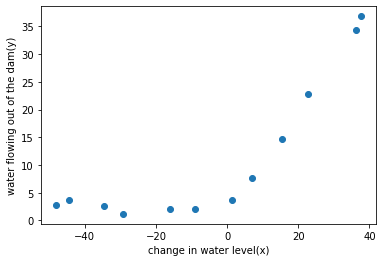

In [10]:
plot_data()

In [11]:
def reg_cost(theta,X,y,lamda):
    cost = np.sum(np.power((X@theta-y.flatten()),2))
    reg = theta[1:]@theta[1:]*lamda
    return (cost+reg)/(2*len(X))


In [12]:
theta = np.ones(X_train.shape[1])
lamda = 1
reg_cost(theta,X_train,y_train,lamda)

303.9931922202643

In [13]:
def reg_gradient(theta,X,y,lamda):

    grad = (X@theta-y.flatten())@X
    reg = lamda*theta
    reg[0] = 0

    return (grad+reg)/len(X)

In [14]:
reg_gradient(theta,X_train,y_train,lamda)

array([-15.30301567, 598.25074417])

In [15]:
def train_model(X,y,lamda):
    theta = np.ones(X.shape[1])

    res = minimize(fun = reg_cost,
    x0= theta,
    args=(X,y,lamda),
    method='TNC',
    jac=reg_gradient
    )
    return res.x

In [16]:
theta_final = train_model(X_train,y_train,lamda = 0)

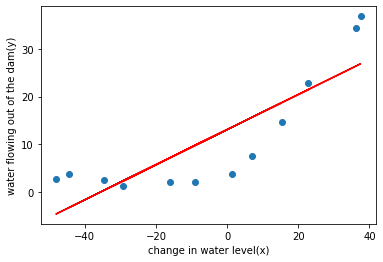

In [20]:
plot_data()
plt.plot(X_train[:,1],X_train@theta_final,c = 'r')
plt.show()

In [23]:
def plot_learning_curve(X_train,y_train,X_val,y_val,lamda):
    x = range(1,len(X_train)+1)
    train_cost = []
    cv_cost = []

    for i in x:
        res = train_model(X_train[:i,:],y_train[:i,:],lamda)
        train_cost_i = reg_cost(res,X_train[:i,:],y_train[:i,:],lamda)
        cv_cost_i = reg_cost(res,X_val,y_val,lamda)
        train_cost.append(train_cost_i)
        cv_cost.append(cv_cost_i) 
    
    plt.plot(x,train_cost,label = 'training cost')
    plt.plot(x,cv_cost,label= 'cv cost')
    plt.legend()
    plt.xlabel('number of training examples')
    plt.ylabel('error')
    plt.show()

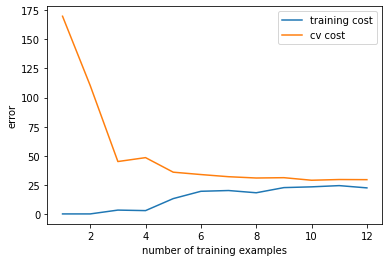

In [24]:
plot_learning_curve(X_train,y_train,X_val,y_val,lamda=0)

多项式特征

In [30]:
def ploy_feature(X,power):
    
    for i in range(2,power+1):
        X=  np.insert(X,X.shape[1],np.power(X[:,1],i),axis=1)
    return X

In [31]:
def get_means_stds(X):
    means = np.mean(X,axis=0)
    stds = np.std(X,axis=0)
    return means,stds

In [32]:
def feature_normalize(X,means,stds):
    X[:,1:] = (X[:,1:] - means[1:])/stds[1:]
    return X

In [33]:
power = 6

In [34]:
X_train_poly = ploy_feature(X_train,power)
X_val_poly = ploy_feature(X_val,power)
X_test_poly = ploy_feature(X_test,power)

In [35]:
train_means,train_stds = get_means_stds(X_train_poly)

In [36]:
X_train_norm = feature_normalize(X_train_poly,train_means,train_stds)
X_val_norm = feature_normalize(X_val_poly,train_means,train_stds)
X_test_norm = feature_normalize(X_test_poly,train_means,train_stds)

In [37]:
theta_fit = train_model(X_train_norm,y_train,lamda = 0)

In [38]:
def plot_ploy_fit():
    plot_data()

    x = np.linspace(-60,60,100)
    xx = x.reshape(100,1)
    xx = np.insert(xx,0,1,axis=1)
    xx = ploy_feature(xx,power)
    xx = feature_normalize(xx,train_means,train_stds)

    plt.plot(x,xx@theta_fit,'r--')

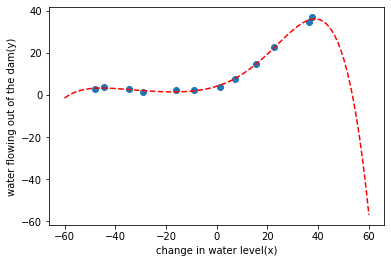

In [39]:
plot_ploy_fit()

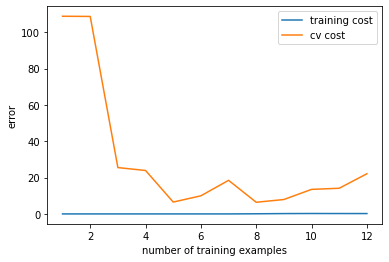

In [40]:
plot_learning_curve(X_train_norm,y_train,X_val_norm,y_val,lamda=0)

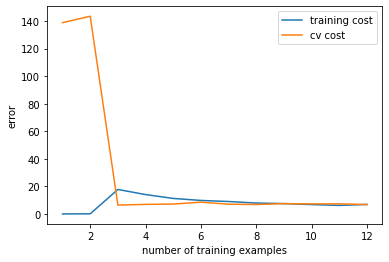

In [41]:
plot_learning_curve(X_train_norm,y_train,X_val_norm,y_val,lamda=1)

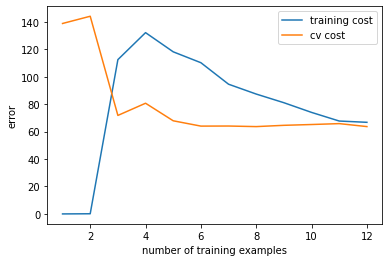

In [42]:
plot_learning_curve(X_train_norm,y_train,X_val_norm,y_val,lamda=100)

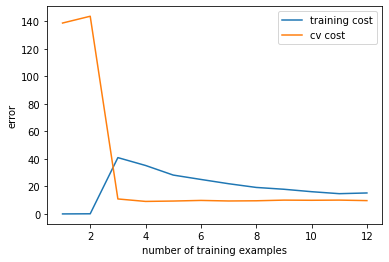

In [43]:
plot_learning_curve(X_train_norm,y_train,X_val_norm,y_val,lamda=3)

In [44]:
lamdas = [0,0.001,0.003,0.01,0.03,0.1,0.3,1,3,10]
training_cost =[]
cv_cost = []

for lamda in lamdas:
    res = train_model(X_train_norm,y_train,lamda)

    tc = reg_cost(res,X_train_norm,y_train,lamda = 0)
    cv = reg_cost(res, X_val_norm,y_val,lamda=0)

    training_cost.append(tc)
    cv_cost.append(cv)

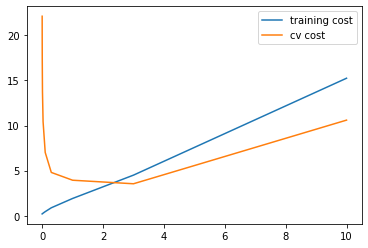

In [45]:
plt.plot(lamdas,training_cost,label = 'training cost')
plt.plot(lamdas,cv_cost,label = 'cv cost')
plt.legend()

plt.show()

In [46]:
lamdas[np.argmin(cv_cost)]

3

In [49]:
res = train_model(X_train_norm,y_train,lamda = 3)
test_cost = reg_cost(res,X_test_norm,y_test,lamda = 0)
test_cost

4.397616043741952